# Activity 11: Encrypt the Classics

Project Gutenberg (https://www.gutenberg.org) is a website that hosts the world’s great literature, with focus on older works for which U.S. copyright has expired. As such, it provides legal access to thousands of books, many of which are stored in a .txt file that can be imported into your Python workflow.

## Directions:

1. **Choose a book to work with**. Navigate to the Top 100 downloaded books section (https://www.gutenberg.org/browse/scores/top) and find a book that calls to you. Click on the list for the book to load the information page for that specific book.
2. **Download a copy of the book** You'll see that each book is available in a few different formats. You could view in HTML (for your web browser), EPUB (for your eBook reader), or Plain Text UTF-8 (a .txt file for your Python notebook). You should right click on the link for the Plain Text UTF-8 .txt file and save it to your local computer. You can open it on your computer to verify it downloaded correctly, it should open in Notepad (Windows) or TextEdit (Mac).
3. **Upload the text file to the activities folder.** Put the `.txt` file in the same folder as this `activity11.ipynb` file on Datahub.
4. **In the cell below, load the text in the text of your chosen book as a string** Refer back to Lab 02 to see how to do this.

In [6]:
with open('book.txt') as f:
	plaintext = f.read()
    
plaintext[0:21]

'The Project Gutenberg'

5. **In the cell below, lean the text using the `text_clean` function you've previously written**. Save the cleaned version of the book as a string named `plaintext` that you'll use in this activity. The string `plaintext` should hold the contents of your book, but only contain the 26 uppercase English letters, without any spaces or punctuation.

In [7]:
def text_clean(text, LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
	ret = ""
	LETTERS += LETTERS.upper()
	LETTERS += LETTERS.lower()
	for l in text:
		if LETTERS.find(l) != -1:
			ret += l

	return ret.upper()

plaintext = text_clean(plaintext)
plaintext[0:19]

'THEPROJECTGUTENBERG'

6. **In the cell below, use `Matplotlib` to create a bar chart**. Create a bar chart that shows the letter frequencies of `plaintext`. Compare how the frequencies of the 26 letters are similar/different to what is typically expected for the English language. You'll probably see that `plaintext` has very similar letter frequencies as "typical" English, but don't be surprised that if the English translation from the ancient Greek version of *The Republic* by Plato doesn't quite follow the same letter distribution as a book from a more modern era!

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

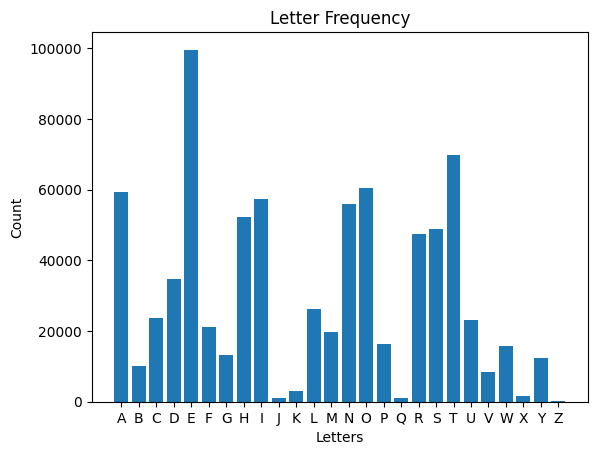

In [8]:
import matplotlib.pyplot as plt

letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
lets = []
nums = []

for l in letters:
	lets.append(l)
	nums.append(plaintext.count(l))

plt.bar(lets, nums)
plt.title('Letter Frequency')
plt.xlabel('Letters')
plt.ylabel('Count')
plt

7. **In the cell below, encrypt your message using the Affine cipher.** You already wrote a function to implement the Caesar cipher. Modifying your Caesar function to encrypt a message for the Affine cipher should only involve taking in another parameter (for the multiplicative key) and then using that key with some multiplication inside the encryption loop. You don't need to have the function decipher messages for this activity, but you *could* think about how you'd do that. Store the encrypted message as `ciphertext`.

In [9]:
def text_block(t, n=5):
	f = ""
	i = 0
	for l in t:
		if i % n == 0 and i != 0:
			f += " "

		f += l
		i += 1

	return f

def affine(text, km, ka, LETTERS="ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
	cipher = ""
	for l in text:
		if LETTERS.find(l.upper()) == -1:
			continue

		num = (LETTERS.index(l.upper())*km + ka) % 26

		cipher += LETTERS[num]

	return text_block(cipher.upper())

ciphertext = affine(plaintext, 137, 14)
print(ciphertext[0:19])
affine(plaintext, 7, 14)[0:19]

RLQPD IZQCR EYRQB V


'RLQPD IZQCR EYRQB V'

8. **In the cell below, ue `Matplotlib` to create a bar chart (again)**. Create a bar chart of the text in `ciphertext`. Notice how the encryption changes the letter frequencies.

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

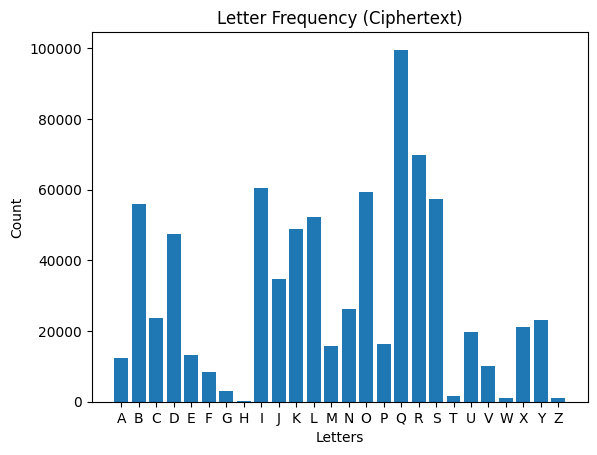

In [10]:
lets2 = []
nums2 = []

for l in letters:
	lets2.append(l)
	nums2.append(ciphertext.count(l))

plt.bar(lets2, nums2)
plt.title('Letter Frequency (Ciphertext)')
plt.xlabel('Letters')
plt.ylabel('Count')
plt

9. **Send the bar chart to a classmate**. 
Email or chat an image of your bar chart for your encrypted text to a classmate. To save the image you can either take a screen shot of your bar chart OR if you right click on the bar chart, you should have an option to "Create a New View for Output". This will put the image into a new window. If you right click on the image in the new window, you should have an option to save it to your computer. Either way, once you have an image file on your computer, you can send that to a classmate.

10. **Guess someone elses keys!** Use the bar chart you received from a classmate to determine the additive and multiplicative keys that they used to create their ciphertext. You'll need to set up a system of congruences and solve for the keys! Once you think you've determined the keys, confirm with the classmate who sent you the bar chart.

![bargraph](bargraph.png "Eleazer Bar Chart")

| Plaintext | Ciphertext |
| --------- | ---------- |
| E | T |
| T | K |
| A | N |

In [12]:
LETTERS="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print(f"{LETTERS.find("E")} -> {LETTERS.find("T")}")
print(f"{LETTERS.find("T")} -> {LETTERS.find("K")}")

4 -> 19
19 -> 10


The multiplicative key is 15 and the additive key is 11